In [ ]:
import wget 

url = "https://download.microsoft.com/download/3/e/1/3e1c3f21-ecdb-4869-8368-6deba77b919f/kagglecatsanddogs_5340.zip"
filename = wget.download(url)

In [7]:
import zipfile

with zipfile.ZipFile("kagglecatsanddogs_5340.zip", "r") as zip_ref:
    zip_ref.extractall() 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import random
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

In [9]:
input_path = []
label = []

for class_name in os.listdir("PetImages"):
  for path in os.listdir("PetImages/" + class_name):
    if class_name == 'Cat':
      print("class cat")
      label.append(0)
    else:
      print("class dog")
      label.append(1)
    input_path.append(os.path.join("PetImages", class_name, path))
print(input_path[0], label[0])

class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat
class cat


In [10]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df['label'] = df['label'].astype('str')
df.head()

,images,label
0,PetImages\Dog\3346.jpg,1
1,PetImages\Dog\4268.jpg,1
2,PetImages\Cat\2751.jpg,0
3,PetImages\Cat\848.jpg,0
4,PetImages\Dog\7355.jpg,1


In [ ]:

df = df[df['images']!='PetImages\Dog\Thumbs.db']
df = df[df['images']!='PetImages\Cat\Thumbs.db']
df = df[df['images']!='PetImages\\Cat\\666.jpg']
df = df[df['images']!='PetImages\\Dog\\11702.jpg']

In [29]:
import PIL 
l = []
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image) 
l

[]

In [31]:
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Dogs')
    plt.axis('off')

<Figure size 2500x2500 with 0 Axes>

In [32]:
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Cats')
    plt.axis('off')

<Figure size 2500x2500 with 0 Axes>

In [33]:
df.head()

,images,label
0,PetImages\Dog\3346.jpg,1
1,PetImages\Dog\4268.jpg,1
2,PetImages\Cat\2751.jpg,0
3,PetImages\Cat\848.jpg,0
4,PetImages\Dog\7355.jpg,1


In [34]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(
    rescale = 1./255,
    
)

train_iterator = train_generator.flow_from_dataframe(
    train, 
    x_col='images', 
    y_col='label',  
    target_size=(128,128), 
    batch_size=64, 
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test, 
    x_col='images', 
    y_col='label',  
    target_size=(128,128), 
    batch_size=64, 
    class_mode='binary'
)

Found 19997 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [36]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPool2D((2,2)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPool2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [37]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,447,137 (24.59 MB)

 Trainable params: 6,447,137 (24.59 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 229s 726ms/step - accuracy: 0.6964 - loss: 0.5798 - val_accuracy: 0.7488 - val_loss: 0.5158
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 203s 649ms/step - accuracy: 0.7414 - loss: 0.5185 - val_accuracy: 0.7524 - val_loss: 0.5319
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 183s 585ms/step - accuracy: 0.7597 - loss: 0.4981 - val_accuracy: 0.8042 - val_loss: 0.4318
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 223s 714ms/step - accuracy: 0.7812 - loss: 0.4677 - val_accuracy: 0.8094 - val_loss: 0.4262
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 215s 687ms/step - accuracy: 0.7989 - loss: 0.4345 - val_accuracy: 0.8092 - val_loss: 0.4157
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 365s 1s/step - accuracy: 0.8077 - loss: 0.4207 - val_accuracy: 0.8228 - val_loss: 0.3890
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 310s 990ms/step - accuracy: 0.8119 - loss: 0.4076 - val_accuracy: 0.8312 - val_loss: 0.3845
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 184s 589ms/step - accuracy: 0.8205 - lo

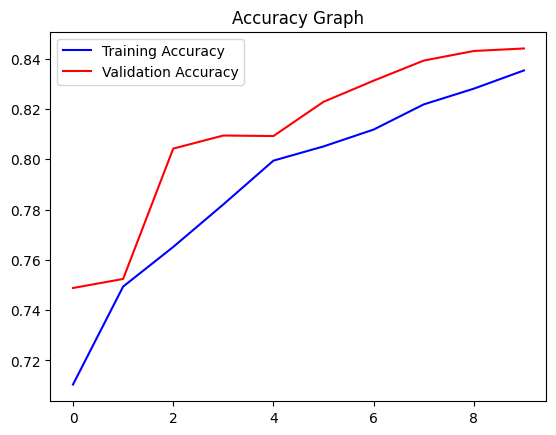

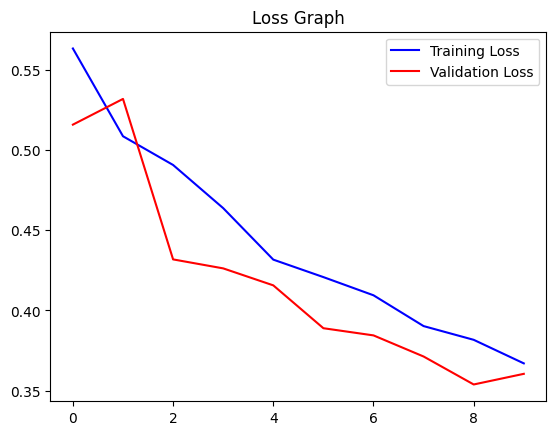

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()


loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()
